### PART C

### It is the same as part B except for using 100 epochs for training

C. Build a baseline model (5 marks)

Use the Keras library to build a neural network with the following:

- One hidden layer of 10 nodes, and a ReLU activation function

- Use the adam optimizer and the mean squared error as the loss function.

1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the train_test_splithelper function from Scikit-learn.

2. Train the model on the training data using 100 epochs.

3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the mean_squared_error function from Scikit-learn.

4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.

5. Report the mean and the standard deviation of the mean squared errors.

In [1]:
import pandas as pd
import numpy as np

Download data

In [2]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Predictors are (according to the assignment instructions):

In [4]:
predictors=concrete_data.drop(['Age','Strength'],axis=1)
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5


Let's normalize the predictors!

In [5]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569


Target variable is:

In [6]:
target = concrete_data['Strength']

Import keras and its utils for model development

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

Network building

In [8]:
n_cols=predictors.shape[1]
print('number of predictor is:',n_cols)

number of predictor is: 7


In [9]:
# define regression model
def regression_model_1():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

Model fitting:

In [10]:
#Define train test 
from sklearn.model_selection import train_test_split

train, test = train_test_split(predictors_norm, test_size=0.3,random_state=1)

Check the shape of train and test:

In [11]:
print('train shape {}, test shape{}'.format(train.shape,test.shape))

train shape (721, 7), test shape(309, 7)


Retrieve the target for train and test:

In [12]:
target_train=target[train.index]
target_test=target[test.index]

In [13]:
model_1=regression_model_1()

In [15]:
model_1.fit(train, target_train, epochs=100)

Epoch 1/100
721/721 [==============================] - 1s 2ms/step - loss: 1610.1571
Epoch 2/100
721/721 [==============================] - 1s 2ms/step - loss: 1593.4928
Epoch 3/100
721/721 [==============================] - 1s 1ms/step - loss: 1577.8851
Epoch 4/100
721/721 [==============================] - 1s 1ms/step - loss: 1563.0761
Epoch 5/100
721/721 [==============================] - 1s 1ms/step - loss: 1548.8736
Epoch 6/100
721/721 [==============================] - 2s 2ms/step - loss: 1535.1530
Epoch 7/100
721/721 [==============================] - 1s 1ms/step - loss: 1521.7449
Epoch 8/100
721/721 [==============================] - 1s 1ms/step - loss: 1508.4789
Epoch 9/100
721/721 [==============================] - 1s 1ms/step - loss: 1495.1215
Epoch 10/100
721/721 [==============================] - 1s 1ms/step - loss: 1481.8811
Epoch 11/100
721/721 [==============================] - 1s 2ms/step - loss: 1467.8148
Epoch 12/100
721/721 [==============================] - 1s 1ms/

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119379). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 1s 2ms/step - loss: 562.9744
Epoch 52/100
721/721 [==============================] - 1s 2ms/step - loss: 541.5255
Epoch 53/100
721/721 [==============================] - 2s 2ms/step - loss: 521.0276
Epoch 54/100
721/721 [==============================] - 2s 2ms/step - loss: 501.0040
Epoch 55/100
721/721 [==============================] - 1s 1ms/step - loss: 481.7227
Epoch 56/100
721/721 [==============================] - 1s 1ms/step - loss: 463.4524
Epoch 57/100
721/721 [==============================] - 1s 2ms/step - loss: 445.9645
Epoch 58/100
721/721 [==============================] - 1s 2ms/step - loss: 429.4821
Epoch 59/100
721/721 [==============================] - 2s 3ms/step - loss: 413.4713A: 1s - l
Epoch 60/100
721/721 [==============================] - 1s 2ms/step - loss: 398.9076
Epoch 61/100
721/721 [==============================] - 1s 1ms/step - loss: 384.4805
Epoch 62/100
721/721 [==============================] - 1s 1ms/step -

Evaluation of the model for test set

In [16]:
pred_test=model_1.predict(test)

MSE evaluation

In [17]:
from sklearn.metrics import mean_squared_error
print('MSE for test set target prediction is ',mean_squared_error(target_test, pred_test))

MSE for test set target prediction is  225.5880714843523


Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors

In [18]:
list_mse=[]
for i in range(50):
    print('------------------------')
    print(i)
    #train test splitting
    train_a, test_a = train_test_split(predictors_norm, test_size=0.3)
    y_train=target[train_a.index]
    y_test=target[test_a.index]
    
    #model declaration and fitting
    model_a=regression_model_1()
    model_a.fit(train_a,y_train,epochs=100)
    #mse computation
    mse_a=mean_squared_error(y_test, model_a.predict(test))
    list_mse.append(mse_a)
    
    
    

------------------------
0
Epoch 1/100
721/721 [==============================] - 4s 6ms/step - loss: 1504.7860
Epoch 2/100
721/721 [==============================] - 1s 2ms/step - loss: 1488.6236
Epoch 3/100
721/721 [==============================] - 1s 1ms/step - loss: 1472.2925: 0s - los
Epoch 4/100
721/721 [==============================] - 1s 1ms/step - loss: 1455.7394
Epoch 5/100
721/721 [==============================] - 2s 2ms/step - loss: 1438.6858
Epoch 6/100
721/721 [==============================] - 2s 3ms/step - loss: 1421.3147
Epoch 7/100
721/721 [==============================] - 1s 2ms/step - loss: 1403.1153
Epoch 8/100
721/721 [==============================] - 1s 1ms/step - loss: 1384.4589
Epoch 9/100
721/721 [==============================] - 1s 1ms/step - loss: 1364.3792
Epoch 10/100
721/721 [==============================] - 1s 2ms/step - loss: 1343.5926
Epoch 11/100
721/721 [==============================] - 1s 1ms/step - loss: 1322.0030
Epoch 12/100
721/721 [====

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119748). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 2ms/step - loss: 974.7120
Epoch 25/100
721/721 [==============================] - 1s 1ms/step - loss: 944.6463A: 1s - loss:
Epoch 26/100
721/721 [==============================] - 1s 1ms/step - loss: 914.5000
Epoch 27/100
721/721 [==============================] - 1s 968us/step - loss: 883.9449
Epoch 28/100
721/721 [==============================] - 1s 888us/step - loss: 853.9272
Epoch 29/100
721/721 [==============================] - 1s 2ms/step - loss: 823.9364
Epoch 30/100
721/721 [==============================] - 2s 2ms/step - loss: 794.1417
Epoch 31/100
721/721 [==============================] - 1s 2ms/step - loss: 764.7165
Epoch 32/100
721/721 [==============================] - 1s 2ms/step - loss: 736.1825
Epoch 33/100
721/721 [==============================] - 1s 1ms/step - loss: 708.1504
Epoch 34/100
721/721 [==============================] - 2s 2ms/step - loss: 680.3882
Epoch 35/100
721/721 [==============================] - 2s 3m

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161650). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 1349.3408
Epoch 10/100
721/721 [==============================] - 2s 2ms/step - loss: 1329.9446
Epoch 11/100
721/721 [==============================] - 2s 3ms/step - loss: 1309.8218
Epoch 12/100
721/721 [==============================] - 2s 2ms/step - loss: 1288.4576
Epoch 13/100
721/721 [==============================] - 2s 2ms/step - loss: 1266.0076
Epoch 14/100
721/721 [==============================] - 2s 2ms/step - loss: 1242.5454
Epoch 15/100
721/721 [==============================] - 2s 2ms/step - loss: 1217.8084
Epoch 16/100
721/721 [==============================] - 2s 3ms/step - loss: 1191.8191
Epoch 17/100
721/721 [==============================] - 3s 4ms/step - loss: 1164.8992
Epoch 18/100
721/721 [==============================] - 2s 2ms/step - loss: 1136.7422
Epoch 19/100
721/721 [==============================] - 2s 2ms/step - loss: 1107.8338
Epoch 20/100
721/721 [==============================] - 2s 2ms/step

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119917). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 2ms/step - loss: 188.0765
Epoch 100/100
721/721 [==============================] - 2s 2ms/step - loss: 187.4513
------------------------
3
Epoch 1/100
721/721 [==============================] - ETA: 0s - loss: 1546.71 - 4s 6ms/step - loss: 1541.8914
Epoch 2/100
721/721 [==============================] - 2s 2ms/step - loss: 1524.9835
Epoch 3/100
721/721 [==============================] - 2s 2ms/step - loss: 1507.5472
Epoch 4/100
721/721 [==============================] - 1s 2ms/step - loss: 1489.9086
Epoch 5/100
721/721 [==============================] - 2s 2ms/step - loss: 1472.0807
Epoch 6/100
721/721 [==============================] - 1s 2ms/step - loss: 1453.3151
Epoch 7/100
721/721 [==============================] - 2s 2ms/step - loss: 1434.3434: 0s - loss: 1467.
Epoch 8/100
721/721 [==============================] - 2s 2ms/step - loss: 1414.4746
Epoch 9/100
721/721 [==============================] - 2s 3ms/step - loss: 1393.5940
Epoch 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.279869). Check your callbacks.
  % delta_t_median)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159879). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 210.1485
Epoch 84/100
721/721 [==============================] - 2s 3ms/step - loss: 208.7919
Epoch 85/100
721/721 [==============================] - 2s 2ms/step - loss: 207.4429
Epoch 86/100
721/721 [==============================] - 3s 4ms/step - loss: 206.1525A: 1s - loss: 195.857 - ETA: 1s - l
Epoch 87/100
721/721 [==============================] - 1s 2ms/step - loss: 204.8777
Epoch 88/100
721/721 [==============================] - 2s 2ms/step - loss: 203.6602
Epoch 89/100
721/721 [==============================] - 1s 1ms/step - loss: 202.4619
Epoch 90/100
721/721 [==============================] - 1s 2ms/step - loss: 201.3194
Epoch 91/100
721/721 [==============================] - 1s 2ms/step - loss: 200.2038
Epoch 92/100
721/721 [==============================] - 1s 2ms/step - loss: 199.0265
Epoch 93/100
721/721 [==============================] - 2s 3ms/step - loss: 197.9589
Epoch 94/100
721/721 [=====================

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100427). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 2ms/step - loss: 193.9465
Epoch 81/100
721/721 [==============================] - 1s 1ms/step - loss: 192.9086
Epoch 82/100
721/721 [==============================] - 1s 1ms/step - loss: 191.9936
Epoch 83/100
721/721 [==============================] - 1s 2ms/step - loss: 191.1378
Epoch 84/100
721/721 [==============================] - 1s 2ms/step - loss: 190.2329
Epoch 85/100
721/721 [==============================] - 2s 3ms/step - loss: 189.3609A: 0s -
Epoch 86/100
721/721 [==============================] - 2s 2ms/step - loss: 188.5451
Epoch 87/100
721/721 [==============================] - 1s 2ms/step - loss: 187.7756
Epoch 88/100
721/721 [==============================] - 2s 3ms/step - loss: 187.0530
Epoch 89/100
721/721 [==============================] - 2s 3ms/step - loss: 186.2926
Epoch 90/100
721/721 [==============================] - 2s 3ms/step - loss: 185.5623
Epoch 91/100
721/721 [==============================] - 1s 2ms/step - l

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101924). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 481.3932
Epoch 51/100
721/721 [==============================] - 2s 2ms/step - loss: 461.5836
Epoch 52/100
721/721 [==============================] - 2s 3ms/step - loss: 442.5799
Epoch 53/100
721/721 [==============================] - 1s 2ms/step - loss: 424.5402
Epoch 54/100
721/721 [==============================] - 2s 2ms/step - loss: 407.9616
Epoch 55/100
721/721 [==============================] - 2s 2ms/step - loss: 391.8063
Epoch 56/100
721/721 [==============================] - 2s 2ms/step - loss: 377.2680
Epoch 57/100
721/721 [==============================] - 1s 2ms/step - loss: 363.2858
Epoch 58/100
721/721 [==============================] - 2s 2ms/step - loss: 350.5222
Epoch 59/100
721/721 [==============================] - 2s 2ms/step - loss: 338.4900
Epoch 60/100
721/721 [==============================] - 1s 2ms/step - loss: 327.5941A: 1s -
Epoch 61/100
721/721 [==============================] - 2s 3ms/step - l

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100441). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 2ms/step - loss: 268.2649
Epoch 68/100
721/721 [==============================] - 1s 2ms/step - loss: 263.5886
Epoch 69/100
721/721 [==============================] - 2s 2ms/step - loss: 259.5023
Epoch 70/100
721/721 [==============================] - 2s 3ms/step - loss: 255.7050
Epoch 71/100
721/721 [==============================] - 2s 2ms/step - loss: 252.3687
Epoch 72/100
721/721 [==============================] - 2s 2ms/step - loss: 249.1852
Epoch 73/100
721/721 [==============================] - 2s 2ms/step - loss: 246.2280
Epoch 74/100
721/721 [==============================] - 1s 2ms/step - loss: 243.4514
Epoch 75/100
721/721 [==============================] - 2s 2ms/step - loss: 241.0217
Epoch 76/100
721/721 [==============================] - 1s 2ms/step - loss: 238.7476
Epoch 77/100
721/721 [==============================] - 1s 1ms/step - loss: 236.6869
Epoch 78/100
721/721 [==============================] - 2s 3ms/step - loss: 23

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123300). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 1488.3525
Epoch 11/100
721/721 [==============================] - 2s 2ms/step - loss: 1470.6109
Epoch 12/100
721/721 [==============================] - 2s 3ms/step - loss: 1452.2734
Epoch 13/100
721/721 [==============================] - 2s 2ms/step - loss: 1432.8884
Epoch 14/100
721/721 [==============================] - 2s 3ms/step - loss: 1412.6088: 0s - l
Epoch 15/100
721/721 [==============================] - 1s 2ms/step - loss: 1391.0612
Epoch 16/100
721/721 [==============================] - 2s 2ms/step - loss: 1368.3648
Epoch 17/100
721/721 [==============================] - 2s 3ms/step - loss: 1344.7711
Epoch 18/100
721/721 [==============================] - 1s 2ms/step - loss: 1319.9927
Epoch 19/100
721/721 [==============================] - 2s 2ms/step - loss: 1293.7085
Epoch 20/100
721/721 [==============================] - 2s 2ms/step - loss: 1266.5678
Epoch 21/100
721/721 [==============================] - 2s 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.190811). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 3s 4ms/step - loss: 548.1924
Epoch 45/100
721/721 [==============================] - 2s 2ms/step - loss: 525.2468
Epoch 46/100
721/721 [==============================] - 1s 2ms/step - loss: 502.9233
Epoch 47/100
721/721 [==============================] - 1s 2ms/step - loss: 481.9868
Epoch 48/100
721/721 [==============================] - 1s 2ms/step - loss: 461.8134
Epoch 49/100
721/721 [==============================] - 2s 2ms/step - loss: 443.1329
Epoch 50/100
721/721 [==============================] - 2s 2ms/step - loss: 425.3662
Epoch 51/100
721/721 [==============================] - 2s 3ms/step - loss: 408.7477
Epoch 52/100
721/721 [==============================] - 2s 3ms/step - loss: 393.1561
Epoch 53/100
721/721 [==============================] - 2s 3ms/step - loss: 378.4362
Epoch 54/100
721/721 [==============================] - 2s 3ms/step - loss: 365.2130
Epoch 55/100
721/721 [==============================] - 2s 2ms/step - loss: 35

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119430). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 1s 2ms/step - loss: 232.1331
Epoch 79/100
721/721 [==============================] - 2s 2ms/step - loss: 230.5645
Epoch 80/100
721/721 [==============================] - 1s 2ms/step - loss: 229.1915
Epoch 81/100
721/721 [==============================] - 2s 2ms/step - loss: 227.6908
Epoch 82/100
721/721 [==============================] - 1s 2ms/step - loss: 226.3941
Epoch 83/100
721/721 [==============================] - 2s 2ms/step - loss: 225.2535
Epoch 84/100
721/721 [==============================] - 2s 3ms/step - loss: 224.0535
Epoch 85/100
721/721 [==============================] - 2s 2ms/step - loss: 222.9345
Epoch 86/100
721/721 [==============================] - 1s 1ms/step - loss: 221.9194
Epoch 87/100
721/721 [==============================] - 2s 2ms/step - loss: 220.8496
Epoch 88/100
721/721 [==============================] - 2s 2ms/step - loss: 219.9199
Epoch 89/100
721/721 [==============================] - 1s 2ms/step - loss: 21

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161345). Check your callbacks.
  % delta_t_median)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111085). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 787.7264
Epoch 33/100
721/721 [==============================] - 2s 2ms/step - loss: 759.7834
Epoch 34/100
721/721 [==============================] - 1s 2ms/step - loss: 732.0390
Epoch 35/100
721/721 [==============================] - 2s 2ms/step - loss: 705.3807
Epoch 36/100
721/721 [==============================] - 2s 3ms/step - loss: 679.0091
Epoch 37/100
721/721 [==============================] - 1s 2ms/step - loss: 653.5087
Epoch 38/100
721/721 [==============================] - 1s 2ms/step - loss: 629.0677
Epoch 39/100
721/721 [==============================] - 2s 2ms/step - loss: 605.0564
Epoch 40/100
721/721 [==============================] - 2s 2ms/step - loss: 581.8259
Epoch 41/100
721/721 [==============================] - 1s 2ms/step - loss: 559.2580
Epoch 42/100
721/721 [==============================] - 1s 1ms/step - loss: 537.6613
Epoch 43/100
721/721 [==============================] - 2s 2ms/step - loss: 51

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100254). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 1s 2ms/step - loss: 228.6748
Epoch 77/100
721/721 [==============================] - 2s 2ms/step - loss: 226.7347
Epoch 78/100
721/721 [==============================] - 2s 2ms/step - loss: 224.9546A: 0s - loss: 2
Epoch 79/100
721/721 [==============================] - 2s 2ms/step - loss: 223.2934
Epoch 80/100
721/721 [==============================] - 2s 2ms/step - loss: 221.6619
Epoch 81/100
721/721 [==============================] - 1s 1ms/step - loss: 220.0978
Epoch 82/100
721/721 [==============================] - 2s 2ms/step - loss: 218.6635
Epoch 83/100
721/721 [==============================] - 2s 3ms/step - loss: 217.2925
Epoch 84/100
721/721 [==============================] - 2s 3ms/step - loss: 215.9853A: 1s - lo
Epoch 85/100
721/721 [==============================] - 2s 3ms/step - loss: 214.7095
Epoch 86/100
721/721 [==============================] - 2s 3ms/step - loss: 213.4632
Epoch 87/100
721/721 [==============================]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131064). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 2ms/step - loss: 208.8385
Epoch 91/100
721/721 [==============================] - 2s 2ms/step - loss: 207.6698
Epoch 92/100
721/721 [==============================] - 1s 2ms/step - loss: 206.6540
Epoch 93/100
721/721 [==============================] - 2s 2ms/step - loss: 205.6167
Epoch 94/100
 64/721 [=>............................] - ETA: 3s - loss: 175.6183

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102224). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 204.5384
Epoch 95/100
721/721 [==============================] - 2s 2ms/step - loss: 203.5371
Epoch 96/100
721/721 [==============================] - 2s 3ms/step - loss: 202.5384A: 0s - loss: 206.12
Epoch 97/100
721/721 [==============================] - 2s 2ms/step - loss: 201.7997
Epoch 98/100
721/721 [==============================] - 2s 3ms/step - loss: 200.7266A: 1s - loss:
Epoch 99/100
721/721 [==============================] - 2s 3ms/step - loss: 199.8373A: 0s - loss
Epoch 100/100
721/721 [==============================] - 2s 3ms/step - loss: 198.9483
------------------------
9
Epoch 1/100
721/721 [==============================] - 4s 6ms/step - loss: 1497.6762
Epoch 2/100
721/721 [==============================] - 2s 2ms/step - loss: 1482.2744
Epoch 3/100
721/721 [==============================] - 2s 2ms/step - loss: 1466.4931
Epoch 4/100
721/721 [==============================] - 1s 2ms/step - loss: 1450.0356
Epoch

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.181311). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 2ms/step - loss: 1286.2920
Epoch 13/100
721/721 [==============================] - 2s 2ms/step - loss: 1261.0723
Epoch 14/100
721/721 [==============================] - 1s 2ms/step - loss: 1235.6191
Epoch 15/100
721/721 [==============================] - 2s 2ms/step - loss: 1208.9409
Epoch 16/100
721/721 [==============================] - 1s 2ms/step - loss: 1181.7302
Epoch 17/100
721/721 [==============================] - 2s 2ms/step - loss: 1153.9468
Epoch 18/100
721/721 [==============================] - 2s 3ms/step - loss: 1124.9826
Epoch 19/100
721/721 [==============================] - 2s 3ms/step - loss: 1096.3631
Epoch 20/100
721/721 [==============================] - 2s 3ms/step - loss: 1067.0538
Epoch 21/100
721/721 [==============================] - 1s 2ms/step - loss: 1037.5304
Epoch 22/100
721/721 [==============================] - 2s 2ms/step - loss: 1007.7316
Epoch 23/100
721/721 [==============================] - 1s 1ms/step

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162293). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 188.3571
Epoch 82/100
721/721 [==============================] - 2s 3ms/step - loss: 187.0296
Epoch 83/100
721/721 [==============================] - 2s 2ms/step - loss: 185.7840
Epoch 84/100
721/721 [==============================] - 2s 3ms/step - loss: 184.6105
Epoch 85/100
721/721 [==============================] - 2s 2ms/step - loss: 183.5411
Epoch 86/100
721/721 [==============================] - 1s 2ms/step - loss: 182.5402
Epoch 87/100
721/721 [==============================] - 2s 3ms/step - loss: 181.6574
Epoch 88/100
721/721 [==============================] - 1s 2ms/step - loss: 180.7341
Epoch 89/100
721/721 [==============================] - 1s 2ms/step - loss: 179.9090
Epoch 90/100
721/721 [==============================] - 2s 2ms/step - loss: 179.1291
Epoch 91/100
721/721 [==============================] - 2s 3ms/step - loss: 178.4491
Epoch 92/100
721/721 [==============================] - 2s 2ms/step - loss: 17

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132380). Check your callbacks.
  % delta_t_median)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102282). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 3s 4ms/step - loss: 627.2376
Epoch 37/100
721/721 [==============================] - 2s 3ms/step - loss: 600.1899
Epoch 38/100
721/721 [==============================] - 2s 3ms/step - loss: 574.1662A: 0s - loss: 
Epoch 39/100
721/721 [==============================] - 2s 2ms/step - loss: 549.5021
Epoch 40/100
721/721 [==============================] - 2s 3ms/step - loss: 525.9402
Epoch 41/100
721/721 [==============================] - 2s 2ms/step - loss: 503.2581
Epoch 42/100
721/721 [==============================] - 1s 2ms/step - loss: 481.4063
Epoch 43/100
721/721 [==============================] - 2s 3ms/step - loss: 460.7015
Epoch 44/100
721/721 [==============================] - 2s 2ms/step - loss: 441.4421
Epoch 45/100
721/721 [==============================] - 2s 2ms/step - loss: 423.0717
Epoch 46/100
721/721 [==============================] - 1s 2ms/step - loss: 405.8389
Epoch 47/100
721/721 [==============================] - 2s 2ms/s

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159415). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 2ms/step - loss: 282.3543
Epoch 58/100
721/721 [==============================] - 1s 2ms/step - loss: 275.9856
Epoch 59/100
721/721 [==============================] - 2s 2ms/step - loss: 270.0909
Epoch 60/100
721/721 [==============================] - 2s 3ms/step - loss: 264.8079
Epoch 61/100
721/721 [==============================] - 3s 4ms/step - loss: 259.9193
Epoch 62/100
721/721 [==============================] - 2s 3ms/step - loss: 255.7218
Epoch 63/100
721/721 [==============================] - 1s 2ms/step - loss: 251.7020
Epoch 64/100
721/721 [==============================] - 2s 2ms/step - loss: 247.9888A: 0s - loss: 245
Epoch 65/100
721/721 [==============================] - 1s 2ms/step - loss: 244.7001
Epoch 66/100
721/721 [==============================] - 2s 2ms/step - loss: 241.6474
Epoch 67/100
721/721 [==============================] - 2s 2ms/step - loss: 238.8238A: 0s - loss: 239.820
Epoch 68/100
721/721 [==================

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.401568). Check your callbacks.
  % delta_t_median)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.220518). Check your callbacks.
  % delta_t_median)


192/721 [======>.......................] - ETA: 2s - loss: 1155.8856

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158983). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 3s 4ms/step - loss: 1151.6454
Epoch 21/100
721/721 [==============================] - 2s 2ms/step - loss: 1128.6910
Epoch 22/100
721/721 [==============================] - 1s 2ms/step - loss: 1105.3103
Epoch 23/100
721/721 [==============================] - 1s 2ms/step - loss: 1081.6041
Epoch 24/100
721/721 [==============================] - 2s 3ms/step - loss: 1057.4138
Epoch 25/100
160/721 [=====>........................] - ETA: 1s - loss: 1054.5809

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141345). Check your callbacks.
  % delta_t_median)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109189). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 1032.9419
Epoch 26/100
721/721 [==============================] - 1s 2ms/step - loss: 1008.4027
Epoch 27/100
721/721 [==============================] - 2s 2ms/step - loss: 983.2947
Epoch 28/100
721/721 [==============================] - 2s 3ms/step - loss: 958.2830
Epoch 29/100
721/721 [==============================] - 2s 2ms/step - loss: 933.4437
Epoch 30/100
721/721 [==============================] - 2s 3ms/step - loss: 907.8569
Epoch 31/100
721/721 [==============================] - 2s 2ms/step - loss: 883.0808
Epoch 32/100
721/721 [==============================] - 2s 2ms/step - loss: 857.9360
Epoch 33/100
721/721 [==============================] - 2s 3ms/step - loss: 833.5083
Epoch 34/100
721/721 [==============================] - 2s 2ms/step - loss: 809.0543
Epoch 35/100
721/721 [==============================] - 1s 2ms/step - loss: 784.8353
Epoch 36/100
721/721 [==============================] - 1s 2ms/step - loss: 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100369). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 2ms/step - loss: 257.9312
Epoch 75/100
721/721 [==============================] - 2s 3ms/step - loss: 253.9051
Epoch 76/100
721/721 [==============================] - 2s 2ms/step - loss: 250.1234
Epoch 77/100
721/721 [==============================] - 2s 2ms/step - loss: 246.6288A: 0s - loss: 266.71 - ETA: 0s - loss: 25 - ETA: 0s - loss: 241
Epoch 78/100
721/721 [==============================] - 2s 2ms/step - loss: 243.3463
Epoch 79/100
721/721 [==============================] - 2s 2ms/step - loss: 240.1589A: 0s - loss: 2
Epoch 80/100
721/721 [==============================] - 2s 3ms/step - loss: 237.3517
Epoch 81/100
721/721 [==============================] - 1s 2ms/step - loss: 234.5659
Epoch 82/100
721/721 [==============================] - 2s 3ms/step - loss: 232.0047
Epoch 83/100
721/721 [==============================] - 2s 2ms/step - loss: 229.5260A: 0s - loss: 228
Epoch 84/100
721/721 [==============================] - 1s 2ms/step 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.176868). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 2ms/step - loss: 306.0475
Epoch 66/100
721/721 [==============================] - 1s 2ms/step - loss: 298.7670
Epoch 67/100
721/721 [==============================] - ETA: 0s - loss: 292.996 - 1s 2ms/step - loss: 291.6436
Epoch 68/100
721/721 [==============================] - 1s 2ms/step - loss: 284.9874
Epoch 69/100
721/721 [==============================] - 1s 2ms/step - loss: 278.8830
Epoch 70/100
721/721 [==============================] - 1s 2ms/step - loss: 273.0951
Epoch 71/100
721/721 [==============================] - 1s 2ms/step - loss: 267.5471
Epoch 72/100
721/721 [==============================] - 1s 2ms/step - loss: 262.2864
Epoch 73/100
721/721 [==============================] - 2s 3ms/step - loss: 257.2826
Epoch 74/100
721/721 [==============================] - 1s 2ms/step - loss: 252.7112
Epoch 75/100
721/721 [==============================] - 1s 2ms/step - loss: 248.0029
Epoch 76/100
721/721 [==============================

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.188250). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 223.5083
Epoch 83/100
721/721 [==============================] - 2s 2ms/step - loss: 220.9853
Epoch 84/100
721/721 [==============================] - 1s 2ms/step - loss: 218.3950
Epoch 85/100
721/721 [==============================] - 2s 3ms/step - loss: 216.1328
Epoch 86/100
721/721 [==============================] - 2s 3ms/step - loss: 213.9582
Epoch 87/100
721/721 [==============================] - 1s 2ms/step - loss: 211.8612
Epoch 88/100
721/721 [==============================] - 1s 2ms/step - loss: 210.1012
Epoch 89/100
721/721 [==============================] - 2s 2ms/step - loss: 208.3396
Epoch 90/100
721/721 [==============================] - 2s 2ms/step - loss: 206.7475A: 0s - loss: 206.776
Epoch 91/100
721/721 [==============================] - 1s 2ms/step - loss: 205.2806A: 0s - l
Epoch 92/100
721/721 [==============================] - 1s 2ms/step - loss: 203.8977
Epoch 93/100
721/721 [==========================

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158853). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 3s 4ms/step - loss: 198.8761
Epoch 92/100
721/721 [==============================] - 2s 2ms/step - loss: 198.0423
Epoch 93/100
721/721 [==============================] - 2s 2ms/step - loss: 197.1108
Epoch 94/100
721/721 [==============================] - 2s 2ms/step - loss: 196.2231
Epoch 95/100
721/721 [==============================] - 2s 3ms/step - loss: 195.3361
Epoch 96/100
721/721 [==============================] - 2s 2ms/step - loss: 194.5159
Epoch 97/100
721/721 [==============================] - 1s 2ms/step - loss: 193.6529
Epoch 98/100
721/721 [==============================] - 1s 2ms/step - loss: 192.9020
Epoch 99/100
721/721 [==============================] - 2s 2ms/step - loss: 192.1070
Epoch 100/100
721/721 [==============================] - 2s 2ms/step - loss: 191.2881
------------------------
15
Epoch 1/100
721/721 [==============================] - 5s 8ms/step - loss: 1573.5967
Epoch 2/100
721/721 [============================

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118045). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 2ms/step - loss: 734.0179
Epoch 39/100
721/721 [==============================] - 1s 2ms/step - loss: 711.7567
Epoch 40/100
721/721 [==============================] - 1s 1ms/step - loss: 690.2861A: 0s - loss: 677.14
Epoch 41/100
721/721 [==============================] - 2s 2ms/step - loss: 669.7157
Epoch 42/100
721/721 [==============================] - 1s 2ms/step - loss: 649.6769
Epoch 43/100
721/721 [==============================] - 2s 3ms/step - loss: 630.4469
Epoch 44/100
721/721 [==============================] - 2s 3ms/step - loss: 612.1286
Epoch 45/100
721/721 [==============================] - 1s 2ms/step - loss: 594.2054
Epoch 46/100
721/721 [==============================] - 2s 3ms/step - loss: 576.5565
Epoch 47/100
721/721 [==============================] - 2s 2ms/step - loss: 560.2130
Epoch 48/100
721/721 [==============================] - 2s 2ms/step - loss: 544.3889
Epoch 49/100
721/721 [==============================] - 1s

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116857). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 1296.8601: 0s - loss: 131
Epoch 15/100
721/721 [==============================] - 1s 2ms/step - loss: 1269.7680
Epoch 16/100
721/721 [==============================] - 2s 3ms/step - loss: 1240.6877
Epoch 17/100
721/721 [==============================] - 2s 2ms/step - loss: 1211.1095
Epoch 18/100
721/721 [==============================] - 2s 2ms/step - loss: 1179.8675
Epoch 19/100
721/721 [==============================] - 2s 3ms/step - loss: 1147.9210
Epoch 20/100
721/721 [==============================] - 2s 3ms/step - loss: 1114.9905
Epoch 21/100
 96/721 [==>...........................] - ETA: 2s - loss: 1075.5927

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119829). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 2ms/step - loss: 1081.9285
Epoch 22/100
721/721 [==============================] - 2s 2ms/step - loss: 1047.7560
Epoch 23/100
721/721 [==============================] - 1s 941us/step - loss: 1013.1992
Epoch 24/100
721/721 [==============================] - 2s 3ms/step - loss: 978.4429
Epoch 25/100
721/721 [==============================] - 1s 2ms/step - loss: 942.9638
Epoch 26/100
721/721 [==============================] - 1s 2ms/step - loss: 907.9997
Epoch 27/100
160/721 [=====>........................] - ETA: 1s - loss: 924.8992

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.198700). Check your callbacks.
  % delta_t_median)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100337). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 873.0945
Epoch 28/100
721/721 [==============================] - 1s 2ms/step - loss: 838.3375
Epoch 29/100
721/721 [==============================] - 2s 3ms/step - loss: 803.3924
Epoch 30/100
721/721 [==============================] - 2s 3ms/step - loss: 770.0896
Epoch 31/100
721/721 [==============================] - 2s 2ms/step - loss: 736.2599
Epoch 32/100
721/721 [==============================] - 2s 2ms/step - loss: 703.3227
Epoch 33/100
721/721 [==============================] - 2s 3ms/step - loss: 671.9872
Epoch 34/100
721/721 [==============================] - 1s 2ms/step - loss: 641.1852A: 0s - loss: 626.77
Epoch 35/100
721/721 [==============================] - 2s 3ms/step - loss: 611.7578
Epoch 36/100
721/721 [==============================] - 2s 3ms/step - loss: 583.2954
Epoch 37/100
721/721 [==============================] - 2s 3ms/step - loss: 556.0292
Epoch 38/100
721/721 [==============================] - 2s

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142780). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 2ms/step - loss: 235.2450
Epoch 63/100
721/721 [==============================] - 2s 3ms/step - loss: 231.6541
Epoch 64/100
721/721 [==============================] - 1s 2ms/step - loss: 228.4809
Epoch 65/100
721/721 [==============================] - 2s 2ms/step - loss: 225.6881
Epoch 66/100
721/721 [==============================] - 1s 2ms/step - loss: 223.0147
Epoch 67/100
721/721 [==============================] - 1s 2ms/step - loss: 220.7487
Epoch 68/100
721/721 [==============================] - 2s 2ms/step - loss: 218.4327
Epoch 69/100
721/721 [==============================] - 2s 2ms/step - loss: 216.4644
Epoch 70/100
721/721 [==============================] - 1s 1ms/step - loss: 214.6572
Epoch 71/100
721/721 [==============================] - 1s 2ms/step - loss: 212.9943
Epoch 72/100
721/721 [==============================] - 2s 2ms/step - loss: 211.4564A: 0s - loss: 212.605
Epoch 73/100
721/721 [==============================] - 2

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116556). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 2ms/step - loss: 193.2347
Epoch 94/100
721/721 [==============================] - 2s 3ms/step - loss: 192.7431A: 0s - loss:
Epoch 95/100
721/721 [==============================] - 2s 3ms/step - loss: 192.1648
Epoch 96/100
721/721 [==============================] - 2s 3ms/step - loss: 191.6810
Epoch 97/100
721/721 [==============================] - 2s 3ms/step - loss: 191.1449
Epoch 98/100
721/721 [==============================] - 1s 2ms/step - loss: 190.7384A: 1s - los
Epoch 99/100
721/721 [==============================] - 1s 2ms/step - loss: 190.2136A: 0s - loss:
Epoch 100/100
128/721 [====>.........................] - ETA: 3s - loss: 173.9906

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169740). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 189.7039
------------------------
17
Epoch 1/100
721/721 [==============================] - 6s 9ms/step - loss: 1573.2844
Epoch 2/100
721/721 [==============================] - 2s 3ms/step - loss: 1555.1399
Epoch 3/100
 96/721 [==>...........................] - ETA: 1s - loss: 1599.5179

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118937). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 1536.7391
Epoch 4/100
721/721 [==============================] - 2s 3ms/step - loss: 1517.9357
Epoch 5/100
721/721 [==============================] - 1s 2ms/step - loss: 1498.9319
Epoch 6/100
721/721 [==============================] - 2s 2ms/step - loss: 1479.4354
Epoch 7/100
721/721 [==============================] - 2s 2ms/step - loss: 1459.6636
Epoch 8/100
721/721 [==============================] - 2s 2ms/step - loss: 1439.3079: 0s - loss: 1455.98
Epoch 9/100
721/721 [==============================] - 2s 3ms/step - loss: 1418.4033
Epoch 10/100
721/721 [==============================] - 2s 2ms/step - loss: 1397.0801
Epoch 11/100
721/721 [==============================] - 1s 2ms/step - loss: 1374.7697
Epoch 12/100
721/721 [==============================] - 2s 2ms/step - loss: 1352.1519
Epoch 13/100
721/721 [==============================] - 2s 3ms/step - loss: 1328.3465
Epoch 14/100
721/721 [==============================]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118850). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 748.7528
Epoch 34/100
721/721 [==============================] - 2s 2ms/step - loss: 717.8114
Epoch 35/100
721/721 [==============================] - 1s 2ms/step - loss: 687.3267
Epoch 36/100
721/721 [==============================] - 1s 2ms/step - loss: 657.4423
Epoch 37/100
721/721 [==============================] - 2s 3ms/step - loss: 628.6522
Epoch 38/100
721/721 [==============================] - 1s 2ms/step - loss: 599.8915
Epoch 39/100
721/721 [==============================] - 2s 2ms/step - loss: 572.7204
Epoch 40/100
721/721 [==============================] - 2s 2ms/step - loss: 546.1899
Epoch 41/100
721/721 [==============================] - 2s 2ms/step - loss: 520.3912
Epoch 42/100
721/721 [==============================] - 1s 2ms/step - loss: 496.1994
Epoch 43/100
721/721 [==============================] - 2s 2ms/step - loss: 472.1582
Epoch 44/100
721/721 [==============================] - 1s 2ms/step - loss: 44

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120425). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 197.3085
Epoch 87/100
721/721 [==============================] - 2s 2ms/step - loss: 196.5051
Epoch 88/100
721/721 [==============================] - 2s 3ms/step - loss: 195.6044
Epoch 89/100
721/721 [==============================] - 2s 3ms/step - loss: 194.9056
Epoch 90/100
721/721 [==============================] - 3s 4ms/step - loss: 194.0694
Epoch 91/100
721/721 [==============================] - 1s 2ms/step - loss: 193.4144
Epoch 92/100
721/721 [==============================] - 1s 2ms/step - loss: 192.6977A: 0s - loss: 175
Epoch 93/100
721/721 [==============================] - 2s 2ms/step - loss: 192.0181
Epoch 94/100
721/721 [==============================] - 2s 3ms/step - loss: 191.3225
Epoch 95/100
721/721 [==============================] - 1s 2ms/step - loss: 190.7281
Epoch 96/100
721/721 [==============================] - 2s 2ms/step - loss: 190.0233
Epoch 97/100
721/721 [==============================] - 2s 3m

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100664). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 572.8822
Epoch 38/100
721/721 [==============================] - 1s 2ms/step - loss: 547.7630
Epoch 39/100
721/721 [==============================] - 1s 2ms/step - loss: 524.3892
Epoch 40/100
721/721 [==============================] - 2s 3ms/step - loss: 501.4800
Epoch 41/100
721/721 [==============================] - 2s 3ms/step - loss: 480.3872
Epoch 42/100
721/721 [==============================] - 2s 3ms/step - loss: 460.3181
Epoch 43/100
721/721 [==============================] - 2s 3ms/step - loss: 440.8853
Epoch 44/100
721/721 [==============================] - 2s 3ms/step - loss: 422.6280A: 1s
Epoch 45/100
721/721 [==============================] - 2s 2ms/step - loss: 405.3541
Epoch 46/100
721/721 [==============================] - 2s 2ms/step - loss: 388.9307
Epoch 47/100
721/721 [==============================] - 1s 2ms/step - loss: 372.8909
Epoch 48/100
721/721 [==============================] - 2s 3ms/step - los

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117267). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 2ms/step - loss: 171.2901
Epoch 98/100
 96/721 [==>...........................] - ETA: 1s - loss: 189.1112

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140269). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 170.9528A: 0s - loss: 169.810 - ETA: 0s - loss: 169.999
Epoch 99/100
721/721 [==============================] - 2s 2ms/step - loss: 170.6835
Epoch 100/100
721/721 [==============================] - 2s 3ms/step - loss: 170.3832
------------------------
21
Epoch 1/100
721/721 [==============================] - 7s 10ms/step - loss: 1590.0719
Epoch 2/100
721/721 [==============================] - 2s 2ms/step - loss: 1576.8918
Epoch 3/100
721/721 [==============================] - 1s 2ms/step - loss: 1563.6869
Epoch 4/100
721/721 [==============================] - 2s 2ms/step - loss: 1549.9504
Epoch 5/100
721/721 [==============================] - 2s 2ms/step - loss: 1535.9464
Epoch 6/100
721/721 [==============================] - 2s 3ms/step - loss: 1521.2205
Epoch 7/100
721/721 [==============================] - 1s 2ms/step - loss: 1505.7535
Epoch 8/100
721/721 [==============================] - 2s 3ms/step - loss: 1489.4420
E

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.214557). Check your callbacks.
  % delta_t_median)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126716). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 2ms/step - loss: 767.6340
Epoch 34/100
721/721 [==============================] - 1s 2ms/step - loss: 736.9593
Epoch 35/100
721/721 [==============================] - 2s 2ms/step - loss: 707.9337
Epoch 36/100
721/721 [==============================] - 2s 2ms/step - loss: 679.3721
Epoch 37/100
721/721 [==============================] - 2s 3ms/step - loss: 651.8628
Epoch 38/100
721/721 [==============================] - 2s 3ms/step - loss: 625.8198
Epoch 39/100
721/721 [==============================] - 2s 2ms/step - loss: 600.2467
Epoch 40/100
721/721 [==============================] - 2s 2ms/step - loss: 576.5208
Epoch 41/100
721/721 [==============================] - 2s 2ms/step - loss: 553.2837
Epoch 42/100
721/721 [==============================] - 2s 2ms/step - loss: 531.5051
Epoch 43/100
721/721 [==============================] - 2s 2ms/step - loss: 510.5134
Epoch 44/100
721/721 [==============================] - 2s 2ms/step - loss: 49

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119729). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 354.1328
Epoch 50/100
721/721 [==============================] - 2s 3ms/step - loss: 342.7857
Epoch 51/100
721/721 [==============================] - 2s 2ms/step - loss: 332.4063
Epoch 52/100
721/721 [==============================] - 1s 1ms/step - loss: 322.6488
Epoch 53/100
721/721 [==============================] - 2s 3ms/step - loss: 313.5357A: 0s - loss
Epoch 54/100
721/721 [==============================] - 2s 3ms/step - loss: 305.5405
Epoch 55/100
721/721 [==============================] - 1s 2ms/step - loss: 298.0905A: 1s - loss: 2
Epoch 56/100
721/721 [==============================] - 2s 3ms/step - loss: 291.1479
Epoch 57/100
721/721 [==============================] - 2s 3ms/step - loss: 284.9294
Epoch 58/100
721/721 [==============================] - 1s 2ms/step - loss: 279.1748
Epoch 59/100
721/721 [==============================] - 2s 3ms/step - loss: 273.9422
Epoch 60/100
721/721 [=============================

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.179703). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 236.9215
Epoch 71/100
721/721 [==============================] - 1s 2ms/step - loss: 234.7978
Epoch 72/100
721/721 [==============================] - 1s 2ms/step - loss: 232.7475
Epoch 73/100
721/721 [==============================] - 1s 2ms/step - loss: 230.6871
Epoch 74/100
721/721 [==============================] - 1s 1ms/step - loss: 228.8052
Epoch 75/100
721/721 [==============================] - 1s 2ms/step - loss: 226.8165
Epoch 76/100
721/721 [==============================] - 1s 2ms/step - loss: 224.8860
Epoch 77/100
721/721 [==============================] - 2s 2ms/step - loss: 223.0934
Epoch 78/100
721/721 [==============================] - 1s 2ms/step - loss: 221.3556
Epoch 79/100
721/721 [==============================] - 2s 2ms/step - loss: 219.6549
Epoch 80/100
721/721 [==============================] - 1s 2ms/step - loss: 217.9162
Epoch 81/100
721/721 [==============================] - 1s 2ms/step - loss: 21

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119597). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 1s 1ms/step - loss: 236.0409
Epoch 65/100
721/721 [==============================] - 1s 1ms/step - loss: 232.4600
Epoch 66/100
721/721 [==============================] - 2s 2ms/step - loss: 229.0155
Epoch 67/100
721/721 [==============================] - 1s 2ms/step - loss: 225.8705
Epoch 68/100
721/721 [==============================] - 1s 2ms/step - loss: 223.2037
Epoch 69/100
721/721 [==============================] - 1s 2ms/step - loss: 220.6345
Epoch 70/100
721/721 [==============================] - 2s 2ms/step - loss: 218.3785
Epoch 71/100
721/721 [==============================] - 1s 2ms/step - loss: 216.2278
Epoch 72/100
721/721 [==============================] - 1s 1ms/step - loss: 214.3067A: 0s - loss: 213.
Epoch 73/100
721/721 [==============================] - 1s 1ms/step - loss: 212.4230
Epoch 74/100
721/721 [==============================] - 1s 1ms/step - loss: 210.8304A: 0s - loss: 205.6
Epoch 75/100
721/721 [===================

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136683). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 1s 860us/step - loss: 230.9222
Epoch 51/100
721/721 [==============================] - 1s 696us/step - loss: 226.2706
Epoch 52/100
721/721 [==============================] - 1s 745us/step - loss: 222.1775
Epoch 53/100
721/721 [==============================] - 1s 915us/step - loss: 218.5252
Epoch 54/100
721/721 [==============================] - 1s 700us/step - loss: 215.3333
Epoch 55/100
721/721 [==============================] - 1s 855us/step - loss: 212.3198
Epoch 56/100
721/721 [==============================] - 1s 1ms/step - loss: 209.7549
Epoch 57/100
721/721 [==============================] - 1s 914us/step - loss: 207.4142
Epoch 58/100
721/721 [==============================] - 1s 750us/step - loss: 205.3112
Epoch 59/100
721/721 [==============================] - 1s 775us/step - loss: 203.3634
Epoch 60/100
721/721 [==============================] - 1s 830us/step - loss: 201.6262
Epoch 61/100
721/721 [==============================] - 0s

In [19]:
#Mean and standard deviation of list of mse

In [20]:
len(list_mse)

50

In [21]:
import statistics

In [22]:
print('Mean of MSEs collected:',statistics.mean(list_mse))
print('Standard Deviation of MSEs collected:',statistics.stdev(list_mse))

Mean of MSEs collected: 449.17940171022923
Standard Deviation of MSEs collected: 30.56832318158094


This values show that the normalization process of feature inputs and increase of epochs guarantee a better performance.

The mean of MSE is lower than the one of part B and standard deviation  decreases (with respect to part B), symptom of a "stability" in mse values (not too many obscillations).

It can be useful to plot the trend of MSE through iterations:

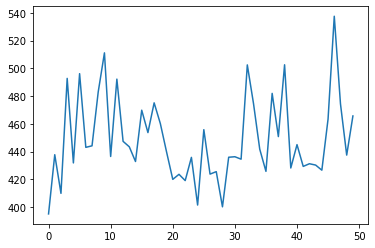

In [23]:
import matplotlib.pyplot as plt
plt.plot(range(50), list_mse)
plt.show()